# Structuring Python code: Modules and Packages
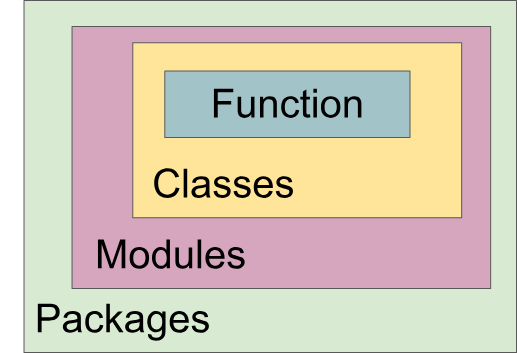!


## What is a Python module and what is it good for?

A module is a file consisting of Python code. A module can define functions, classes and variables. A module can also include runnable code.

Use modules to organize your program logically

- Split the code into several files for easier maintenance.
- Group related code into a module.
- Share common code between scripts.
- Publish modules on the web for other people to use (even better: create a **package**, see below).


### Using modules

We have already seen some example of usage in the previous lecture part

```python
import itertools
# Access function from the module
itertools.product

# Alias
import itertools as itools
itool.product

# The following is considered a bad practice
from itertools import *
# Easy to shadow existing variables (also hard for IDEs)
```


## What makes `itertools` into a module and not a package?

It is a single file!
Python has a lot of built-in modules

```python
import sys
print(sys.builtin_module_names)
```


## Creating and using Python modules

Creating own modules in Python is **very simple**:

1. Put any code (variables, functions, classes) that should be part of the module in a Python file.

Let us consider a simple user-defined function, put in the file `user_factorial.py`


In [8]:
%%writefile code_factorial.py

def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)


Writing code_factorial.py


In [9]:
!head -n 20 code_factorial.py


def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)


We can now import this function to our code by calling


In [11]:
from code_factorial import factorial
factorial(5)

120

How does Python find your modules? When importing a module (or package module), Python tries to find it in multiples places (in this order):

    - The built-in modules shown above
    - Your current working directory.
    - Paths defined by the environment variable $PYTHONPATH.
    - Some global paths, e.g. /usr/lib/python3.7/site-packages. This depends on your OS and Python installation.

This can be verified as follows via another useful module `sys`


In [12]:
import sys
# Notice the order
sys.path

['/home/shailendra/Documents/lectures/Problem_solving/project&Assignment/Lecture7',
 '/home/shailendra/anaconda3/envs/myenv/lib/python311.zip',
 '/home/shailendra/anaconda3/envs/myenv/lib/python3.11',
 '/home/shailendra/anaconda3/envs/myenv/lib/python3.11/lib-dynload',
 '',
 '/home/shailendra/anaconda3/envs/myenv/lib/python3.11/site-packages']

## Test block in a module

Module files can have a test/demo section at the end:

- The block is executed _only if_ the module file is run as a program (not if imported by another script)
- The tests at the end of a module often serve as good examples on the usage of the module

For the problem above, we add a simple hard-coded test of the factorial function


In [13]:
!tail -n 11 code_factorial.py


def factorial(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)


In [14]:
!python3 code_factorial.py 6

## What is a package?

A package is a hierarchical file directory structure that consists of modules and subpackages and sub-subpackages, and so on.

**Example:**

```python
from scipy.optimize import minimize
#      ^      ^               ^
#      |      |               |
#   Package   |               |
#           Module            |
#                          Function
```

Packages allow to organize modules and scripts into single environment. These can then easily be distributed and imported by name.


Python comes with a set of powerful packages, e.g.

- **scipy** Scientific Python
- **numpy** Numerical Python
- **ipython** Interactive Python
- **matplotlib** Plotting
- **pandas** Data analysis
- **scikit learn** Machine learning

_Several useful packages are included in Python distributions like Anaconda_


## Creating a package

- A set of modules can be collected in a _package_
- A package is organized as module files in a directory tree
- Each subdirectory must have a `__init__.py` file (can be empty)
- More infos: [Section 6 in the Python Tutorial](https://docs.python.org/3/tutorial/modules.html)



## Installing a Python package

One could in theory append the path to a package to the environment variable `PYTHONPATH`.
However, this is not recommened, as it does not check dependencies and is not portable across systems.


A better option is to reate a `pyproject.toml` file in your package root directory.
We start by expecting this file


In [63]:
!head -n 25 examples/my-package/pyproject.toml

[build-system]
requires = ["setuptools>=64.4.0", "wheel", "pip>=22.3"]


[project]
name="pkg"
authors=[{"name"="Jørgen S. Dokken", "email"="dokken@simula.no"},
         {"name"="Miroslav Kuchta", "email"="miroslav.kuchta@gmail.com"}
]
readme="README.md"
license={"file"="LICENSE"}
version="0.1.0"
requires-python=">=3.8"
dependencies=["numpy>=1.20.0"]

[project.optional-dependencies]
test = [
    "pytest",
]
dev = [
    "pdbpp", "ipython"
]


We now consider each of the sections in this file in turn.
First we consider the `[...]`-notation. This defines a heading in a table, and we can create sub-tables, such as `[a]` and `[a.b]`.
Many Python packages support their own headings for configuring the repository, such as formatting, import sorting, type-checking etc.

### build-system

Installing a package in Python means taking a set of files, and do some or all of the following options

- Compile files from foreign languages (such as C/C++)
- Move files from the current root directory to an appropriate path for the current installation of Python
  We will use [setuptools](https://setuptools.pypa.io/) for this, a common Python packager.

With the file above, we can now call the following.
Pip will always install in the _current Python environment_,
which may be system-wide (usually requires root permissions), per-user, or in a virtual environment.


In [64]:
!python3 -m pip install ./examples/my-package

Processing ./examples/my-package
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pkg: filename=pkg-0.1.0-py3-none-any.whl size=3881 sha256=4a38e99084fdf3ea23d9d46ff357efe2aca6ec3d08a63c29f3ce6131fdaa89da
  Stored in directory: /home/dokken/.cache/pip/wheels/e7/be/ae/c7a1fe811e9515c9b17aa8a901178b4faa716117ff2d3aab87
Successfully built pkg

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


We can check where the package now is located by calling


In [65]:
!python3 -c "import pkg; print(pkg.__path__)"

['/home/dokken/src/mambaforge/envs/UIO-IN3110/lib/python3.10/site-packages/pkg']


## Editable installation

As we have seen in the scripts above, the files are copied from the current location to the another place on disk specific to the Python installation. With rapid development, this would be a time-consuming and annoying task. Therefore, one can use [editable installations](https://setuptools.pypa.io/en/latest/userguide/development_mode.html) that creates special `.pth` file in the Python-installations site package, that extends the Python-path to the package directory. This means that one do not have to re-install the package to reflect changes


In [66]:
!python3 -m pip uninstall -y pkg
!python3 -m pip install -e ./examples/my-package -v

Found existing installation: pkg 0.1.0
Uninstalling pkg-0.1.0:
  Successfully uninstalled pkg-0.1.0
Using pip 23.1.2 from /home/dokken/.local/lib/python3.10/site-packages/pip (python 3.10)
Obtaining file:///home/dokken/Documents/src/UiO/UiO-IN3110.github.io/lectures/python/examples/my-package
  Installing build dependencies ...   Running command pip subprocess to install build dependencies
    Using cached setuptools-68.2.2-py3-none-any.whl (807 kB)
    Using cached wheel-0.41.3-py3-none-any.whl (65 kB)
    Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
  tensorboard 2.11.1 requires markdown>=2.6.8, which is not installed.
  tensorboard 2.11.1 requires protobuf<4,>=3.9.2, which is not installed.
  tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, which is not installed.
  numba 0.56.4 requires numpy<1.24,>=1.

In [67]:
!python3 -c "import pkg; print(pkg.__path__)"

['/home/dokken/Documents/src/UiO/UiO-IN3110.github.io/lectures/python/examples/my-package/src/pkg']


# Project specification


In [68]:
!head -n15 ./examples/my-package/pyproject.toml | tail -n11

[project]
name="pkg"
authors=[{"name"="Jørgen S. Dokken", "email"="dokken@simula.no"},
         {"name"="Miroslav Kuchta", "email"="miroslav.kuchta@gmail.com"}
]
readme="README.md"
license={"file"="LICENSE"}
version="0.1.0"
requires-python=">=3.8"
dependencies=["numpy>=1.20.0"]



## Package name

As seen in the file above, we observe that we do not need to specify alot in the project description.
We give the package a name, which should be reflected in `/src/pkg`. We use the source layout as it avoids some issues with a flat package structure, see [Python packaging guide](https://packaging.python.org/en/latest/discussions/src-layout-vs-flat-layout/) for more details.

## Author list

We create a list of authors with their name and email.


We will now work on the package with an aim to cover some of the existing functionality by testing and add new functionality by
practicing test-drive-development. First some crash-course in Python unit testing.


## README

A package should have a description. This should be placed in a README file. The string should contain the local path (relative to the `pyproject.toml` file) to the description file.


### Licensing

It is very important to have a license for your published code. This is how you instruct anyone that wants to use it on the terms and conditions of copying or modifying the code. [ChooseYourLicense](https://choosealicense.com/) is a good source of information.
A summary of recommened licenses:

- **MIT**: Permissive - Others can use your code in any way, and you will not be sued if the software doesn't work (recommended in most cases)
- **GPL**: Copyleft - derivative work must use the same license - good way to embrace open source but often problematic for commercial companies
- **LGPL**: Similar to GPL but software can be used under different license
- **CC-BY-4.0** - Typically used for creative work (more journals use this)


## Version

Given a version number `MAJOR.MINOR.PATCH`, increment the:

1. `MAJOR` version when you make incompatible API changes
2. `MINOR` version when you add functionality in a backward compatible manner
3. `PATCH` version when you make backward compatible bug fixes

This is called semantic versioning, see [semver.org](https://semver.org/) for details.


## Python versioning

As Python evolves and introduces new features and deprecates versions, your software should do the same. Decide on a minimal requirement for Python (and in some cases a maximum version if a package you are using is not supporting the latest Python version).


## Dependencies

As our package might depend on external software, we create a list of packages such as `["numpy>=1.21", "sklearn==1.3.0"]` etc.
These will be installed if not found on the system at the time of installation.


## Optional dependencies

Sometimes, we require dependencies for testing or development that are not requirements of the source code. We call these optional dependencies and list them as below


In [69]:
!tail -8 ./examples/my-package/pyproject.toml


[project.optional-dependencies]
test = [
    "pytest",
]
dev = [
    "pdbpp", "ipython"
]


We install these by calling

```
python3 -m pip install .... path/to/package[dev]
```

or

```
python3 -m pip install .... path/to/package[test]
```

or

```
python3 -m pip install .... path/to/package[dev,test]
```


In [70]:
!python3 -m pip install -e ./examples/my-package[dev,test]

Obtaining file:///home/dokken/Documents/src/UiO/UiO-IN3110.github.io/lectures/python/examples/my-package
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached pdbpp-0.10.3-py2.py3-none-any.whl (23 kB)
  Using cached fancycompleter-0.9.1-py3-none-any.whl (9.7 kB)
  Using cached pyrepl-0.9.0-py3-none-any.whl
  Building editable for pkg (pyproject.toml) ... done
  Created wheel for pkg: filename=pkg-0.1.0-0.editable-py3-none-any.whl size=2854 sha256=efbde18e0330484f94cd6f9cad380eb1166038c8641ccb2376635597a4fdb116
  Stored in directory: /tmp/pip-ephem-wheel-cache-tu8kamji/wheels/e7/be/ae/c7a1fe811e9515c9b17aa8a901178b4faa716117ff2d3aab87
Successfully built pkg
  Attempting uninstall: pkg
    Found existing installation: pkg 0.1.0
    Uninstalling pkg-0.1.0:
      Successfully uninstalled pkg-0.1.0

[notice] A new release of